In [1]:
import pandas as pd
import numpy as np
import requests as req
import os
import matplotlib.pyplot as plt
%matplotlib inline
import datetime 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
import patsy as ps
import scipy
# !pip install imblearn
# SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve, plot_confusion_matrix

In [2]:
import warnings  # Ignoring the any possible warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('max_columns', None) # Printing all columns 

In [4]:
data_path= '/Users/dheerajdhanvee/Desktop/JHU/Spring2022/Computing for Applied Math/Assignments/Final_assignment'
data= pd.read_csv(data_path+'/'+'TRAIN.csv')

In [5]:
print(data.shape)
data.describe(include='all')

(164575, 34)


,LID,MRP,CHANNEL,SELLER,ORATE,CRATE,OUPB,OLTERM,ODATE,FPD,LA,TMTLM,RMTM,MDATE,LOTV,CLTV,NB,DTI,BCSAO,CBCSAO,FTHBI,LP,PTYPE,NUNITS,OCCSTAT,STATE,MSA,ZIP,MIP,CLDS,MIT,RMI,FORECLOSED,NMONTHS
count,1.645750e+05,164575,164575,164575,164575.000000,164575.000000,164575.000000,164575.000000,164575,164575,164575.000000,164575.000000,164575.000000,164575.000000,164574.000000,670.000000,164377.000000,157577.000000,160594.000000,82354.000000,164357,164575,164575,164575.000000,164575,164575,164575.000000,164575.000000,54314.000000,164575.000000,54314.000000,164575,164575,164575.000000
unique,NaN,3,3,22,NaN,NaN,NaN,NaN,15,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4,5,NaN,3,53,NaN,NaN,NaN,NaN,NaN,2,2,NaN
top,NaN,1/1/2000,R,Other,NaN,NaN,NaN,NaN,12/1/1999,2/1/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,P,SF,NaN,P,CA,NaN,NaN,NaN,NaN,NaN,N,False,NaN
freq,NaN,66319,85220,41732,NaN,NaN,NaN,NaN,57738,56182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137174,109018,141009,NaN,150824,16776,NaN,NaN,NaN,NaN,NaN,162948,162328,NaN
mean,5.495945e+11,NaN,NaN,NaN,8.009613,8.009618,119880.012153,326.692712,NaN,NaN,0.551129,326.141583,325.163293,39566.140562,76.381306,88.811940,1.615062,34.342252,715.008238,722.598999,NaN,NaN,NaN,1.038122,NaN,NaN,26496.797387,517.158232,24.360294,0.002309,1.039327,NaN,NaN,36.174152
std,2.601692e+11,NaN,NaN,NaN,0.455494,0.455495,56440.072097,69.269975,NaN,NaN,1.177450,69.274273,69.627902,39303.170443,16.345645,10.408424,0.522805,11.999273,54.978450,53.548890,NaN,NaN,NaN,0.243161,NaN,NaN,14029.437754,295.429158,6.413765,0.048999,0.194657,NaN,NaN,35.772172
min,1.000110e+11,NaN,NaN,NaN,3.000000,3.000000,6000.000000,84.000000,NaN,NaN,-1.000000,81.000000,8.000000,12008.000000,4.000000,25.000000,1.000000,1.000000,350.000000,396.000000,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,0.000000,6.000000,0.000000,1.000000,NaN,NaN,1.000000
25%,3.236520e+11,NaN,NaN,NaN,7.750000,7.750000,75000.000000,360.000000,NaN,NaN,0.000000,358.000000,357.000000,12030.000000,70.000000,89.000000,1.000000,26.000000,676.000000,686.000000,NaN,NaN,NaN,1.000000,NaN,NaN,16980.000000,298.000000,18.000000,0.000000,1.000000,NaN,NaN,18.000000
50%,5.498040e+11,NaN,NaN,NaN,8.000000,8.000000,111000.000000,360.000000,NaN,NaN,0.000000,359.000000,359.000000,22030.000000,80.000000,90.000000,2.000000,34.000000,722.000000,732.000000,NaN,NaN,NaN,1.000000,NaN,NaN,29820.000000,483.000000,25.000000,0.000000,1.000000,NaN,NaN,27.000000
75%,7.750650e+11,NaN,NaN,NaN,8.250000,8.250000,156000.000000,360.000000,NaN,NaN,1.000000,360.000000,360.000000,32030.000000,90.000000,95.000000,2.000000,42.000000,759.000000,765.000000,NaN,NaN,NaN,1.000000,NaN,NaN,38060.000000,794.000000,30.000000,0.000000,1.000000,NaN,NaN,39.000000


In [6]:
data.nunique()

LID           150201
MRP                3
CHANNEL            3
SELLER            22
ORATE            271
CRATE            271
OUPB             367
OLTERM           104
ODATE             15
FPD               16
LA                15
TMTLM            166
RMTM             297
MDATE            177
LOTV              94
CLTV              50
NB                 9
DTI               64
BCSAO            369
CBCSAO           340
FTHBI              2
LP                 4
PTYPE              5
NUNITS             4
OCCSTAT            3
STATE             53
MSA              406
ZIP              903
MIP               28
CLDS               3
MIT                3
RMI                2
FORECLOSED         2
NMONTHS          260
dtype: int64

# Dropping all the Date Columns: ODATE, MDATE, FPD, MRP,


In [7]:
data.drop(columns=['ODATE', 'MDATE', 'FPD','MRP'], inplace=True)

# Also dropping NMONTHS as we are doing classification (FORECLOSED)

In [8]:
data.drop(columns=['FORECLOSED'], inplace=True)

In [9]:
print(data.shape)
data.describe(include='all')

(164575, 29)


,LID,CHANNEL,SELLER,ORATE,CRATE,OUPB,OLTERM,LA,TMTLM,RMTM,LOTV,CLTV,NB,DTI,BCSAO,CBCSAO,FTHBI,LP,PTYPE,NUNITS,OCCSTAT,STATE,MSA,ZIP,MIP,CLDS,MIT,RMI,NMONTHS
count,1.645750e+05,164575,164575,164575.000000,164575.000000,164575.000000,164575.000000,164575.000000,164575.000000,164575.000000,164574.000000,670.000000,164377.000000,157577.000000,160594.000000,82354.000000,164357,164575,164575,164575.000000,164575,164575,164575.000000,164575.000000,54314.000000,164575.000000,54314.000000,164575,164575.000000
unique,NaN,3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4,5,NaN,3,53,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,R,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,P,SF,NaN,P,CA,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,85220,41732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137174,109018,141009,NaN,150824,16776,NaN,NaN,NaN,NaN,NaN,162948,NaN
mean,5.495945e+11,NaN,NaN,8.009613,8.009618,119880.012153,326.692712,0.551129,326.141583,325.163293,76.381306,88.811940,1.615062,34.342252,715.008238,722.598999,NaN,NaN,NaN,1.038122,NaN,NaN,26496.797387,517.158232,24.360294,0.002309,1.039327,NaN,36.174152
std,2.601692e+11,NaN,NaN,0.455494,0.455495,56440.072097,69.269975,1.177450,69.274273,69.627902,16.345645,10.408424,0.522805,11.999273,54.978450,53.548890,NaN,NaN,NaN,0.243161,NaN,NaN,14029.437754,295.429158,6.413765,0.048999,0.194657,NaN,35.772172
min,1.000110e+11,NaN,NaN,3.000000,3.000000,6000.000000,84.000000,-1.000000,81.000000,8.000000,4.000000,25.000000,1.000000,1.000000,350.000000,396.000000,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,0.000000,6.000000,0.000000,1.000000,NaN,1.000000
25%,3.236520e+11,NaN,NaN,7.750000,7.750000,75000.000000,360.000000,0.000000,358.000000,357.000000,70.000000,89.000000,1.000000,26.000000,676.000000,686.000000,NaN,NaN,NaN,1.000000,NaN,NaN,16980.000000,298.000000,18.000000,0.000000,1.000000,NaN,18.000000
50%,5.498040e+11,NaN,NaN,8.000000,8.000000,111000.000000,360.000000,0.000000,359.000000,359.000000,80.000000,90.000000,2.000000,34.000000,722.000000,732.000000,NaN,NaN,NaN,1.000000,NaN,NaN,29820.000000,483.000000,25.000000,0.000000,1.000000,NaN,27.000000
75%,7.750650e+11,NaN,NaN,8.250000,8.250000,156000.000000,360.000000,1.000000,360.000000,360.000000,90.000000,95.000000,2.000000,42.000000,759.000000,765.000000,NaN,NaN,NaN,1.000000,NaN,NaN,38060.000000,794.000000,30.000000,0.000000,1.000000,NaN,39.000000


# Dealing with Numerical Columns:

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164575 entries, 0 to 164574
Data columns (total 29 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   LID      164575 non-null  float64
 1   CHANNEL  164575 non-null  object 
 2   SELLER   164575 non-null  object 
 3   ORATE    164575 non-null  float64
 4   CRATE    164575 non-null  float64
 5   OUPB     164575 non-null  int64  
 6   OLTERM   164575 non-null  int64  
 7   LA       164575 non-null  int64  
 8   TMTLM    164575 non-null  int64  
 9   RMTM     164575 non-null  int64  
 10  LOTV     164574 non-null  float64
 11  CLTV     670 non-null     float64
 12  NB       164377 non-null  float64
 13  DTI      157577 non-null  float64
 14  BCSAO    160594 non-null  float64
 15  CBCSAO   82354 non-null   float64
 16  FTHBI    164357 non-null  object 
 17  LP       164575 non-null  object 
 18  PTYPE    164575 non-null  object 
 19  NUNITS   164575 non-null  int64  
 20  OCCSTAT  164575 non-null  

In [11]:
num_df= data.select_dtypes(include=np.number)

In [12]:
num_df.columns

Index(['LID', 'ORATE', 'CRATE', 'OUPB', 'OLTERM', 'LA', 'TMTLM', 'RMTM',
       'LOTV', 'CLTV', 'NB', 'DTI', 'BCSAO', 'CBCSAO', 'NUNITS', 'MSA', 'ZIP',
       'MIP', 'CLDS', 'MIT', 'NMONTHS'],
      dtype='object')

# EDA with Numerical data

In [13]:
print(num_df.shape)
num_df.describe()

(164575, 21)


,LID,ORATE,CRATE,OUPB,OLTERM,LA,TMTLM,RMTM,LOTV,CLTV,NB,DTI,BCSAO,CBCSAO,NUNITS,MSA,ZIP,MIP,CLDS,MIT,NMONTHS
count,1.645750e+05,164575.000000,164575.000000,164575.000000,164575.000000,164575.000000,164575.000000,164575.000000,164574.000000,670.000000,164377.000000,157577.000000,160594.000000,82354.000000,164575.000000,164575.000000,164575.000000,54314.000000,164575.000000,54314.000000,164575.000000
mean,5.495945e+11,8.009613,8.009618,119880.012153,326.692712,0.551129,326.141583,325.163293,76.381306,88.811940,1.615062,34.342252,715.008238,722.598999,1.038122,26496.797387,517.158232,24.360294,0.002309,1.039327,36.174152
std,2.601692e+11,0.455494,0.455495,56440.072097,69.269975,1.177450,69.274273,69.627902,16.345645,10.408424,0.522805,11.999273,54.978450,53.548890,0.243161,14029.437754,295.429158,6.413765,0.048999,0.194657,35.772172
min,1.000110e+11,3.000000,3.000000,6000.000000,84.000000,-1.000000,81.000000,8.000000,4.000000,25.000000,1.000000,1.000000,350.000000,396.000000,1.000000,0.000000,0.000000,6.000000,0.000000,1.000000,1.000000
25%,3.236520e+11,7.750000,7.750000,75000.000000,360.000000,0.000000,358.000000,357.000000,70.000000,89.000000,1.000000,26.000000,676.000000,686.000000,1.000000,16980.000000,298.000000,18.000000,0.000000,1.000000,18.000000
50%,5.498040e+11,8.000000,8.000000,111000.000000,360.000000,0.000000,359.000000,359.000000,80.000000,90.000000,2.000000,34.000000,722.000000,732.000000,1.000000,29820.000000,483.000000,25.000000,0.000000,1.000000,27.000000
75%,7.750650e+11,8.250000,8.250000,156000.000000,360.000000,1.000000,360.000000,360.000000,90.000000,95.000000,2.000000,42.000000,759.000000,765.000000,1.000000,38060.000000,794.000000,30.000000,0.000000,1.000000,39.000000
max,9.999970e+11,12.325000,12.325000,486000.000000,360.000000,13.000000,361.000000,360.000000,97.000000,146.000000,10.000000,64.000000,850.000000,834.000000,4.000000,49740.000000,999.000000,50.000000,2.000000,3.000000,260.000000


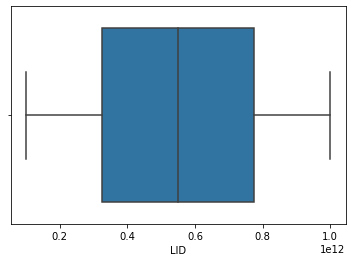

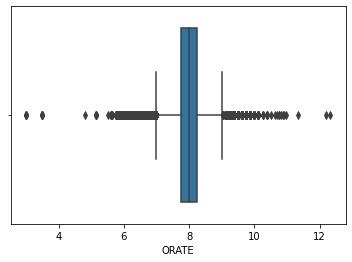

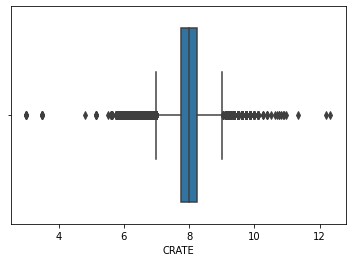

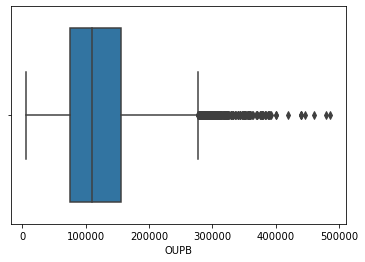

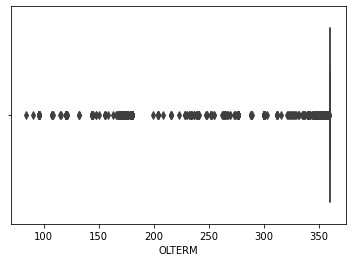

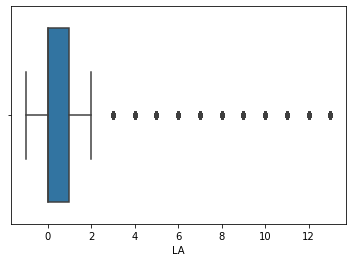

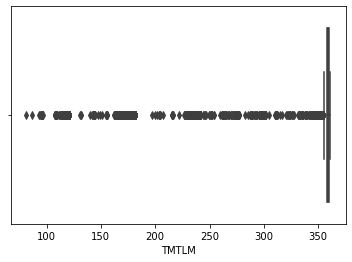

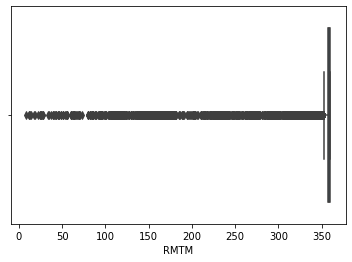

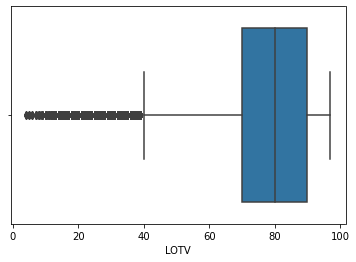

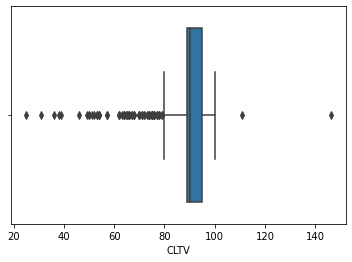

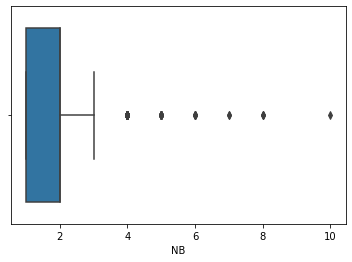

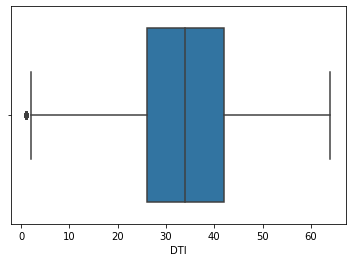

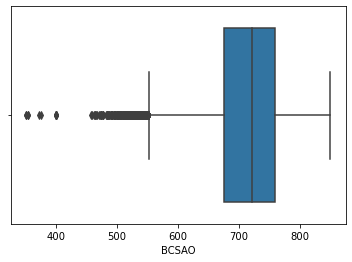

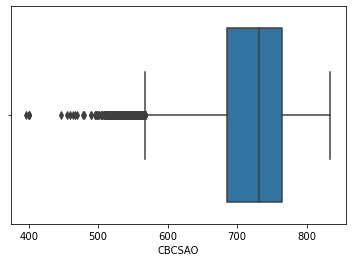

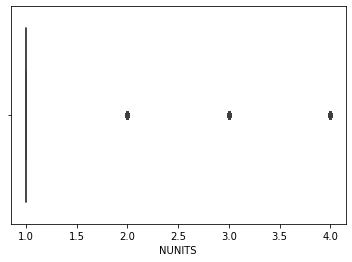

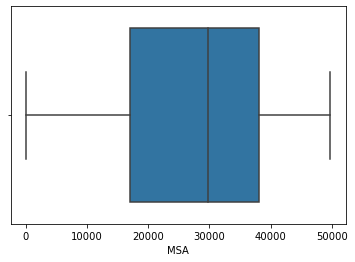

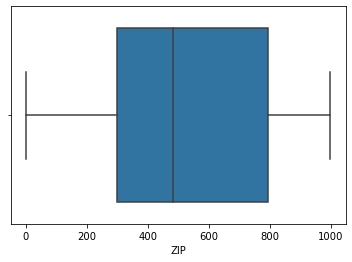

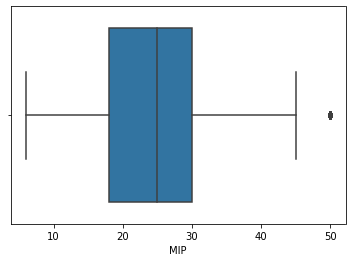

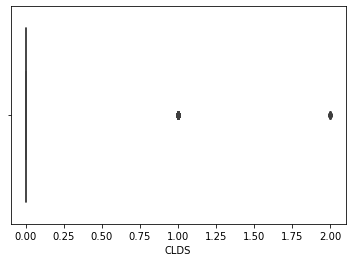

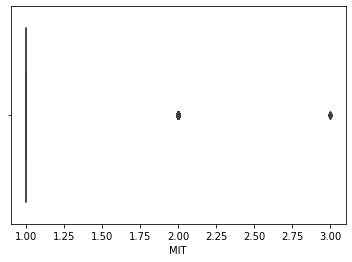

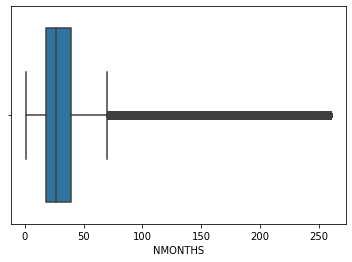

In [14]:
# BoxPlots: Helps in finding the Outliers if any!
for i in num_df.columns:
    sns.boxplot(num_df[i])
    plt.show()

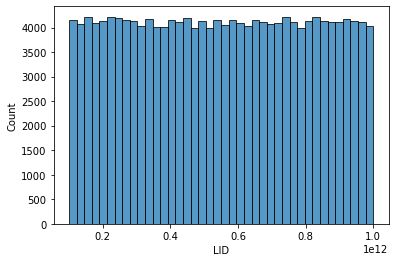

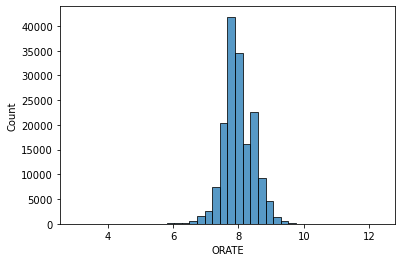

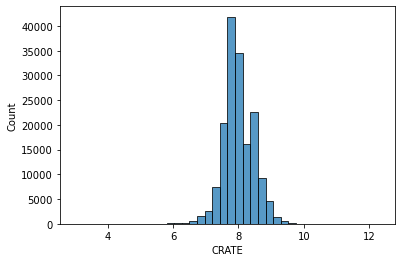

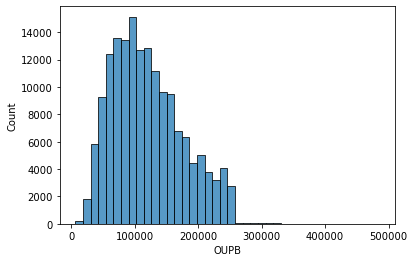

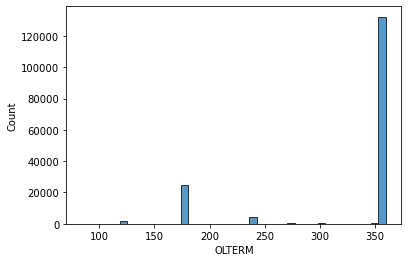

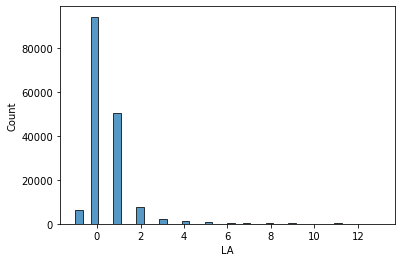

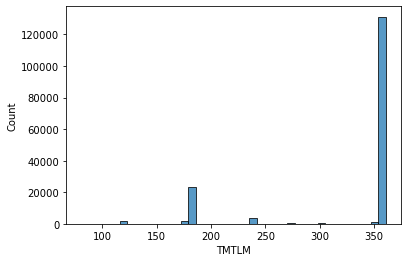

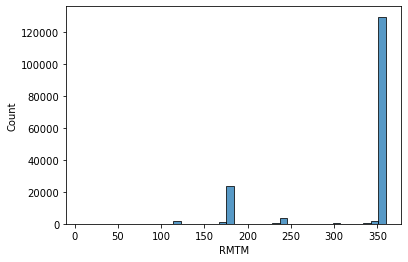

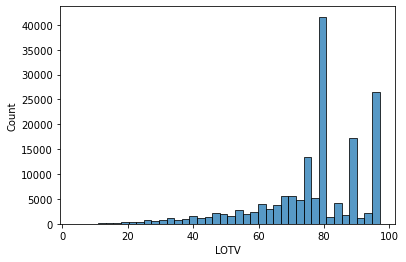

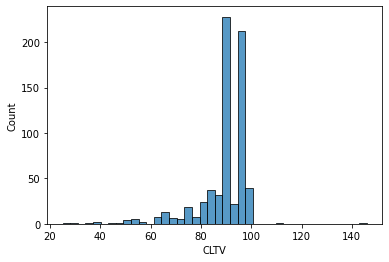

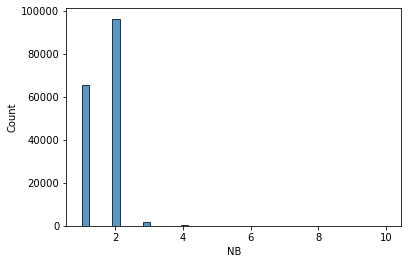

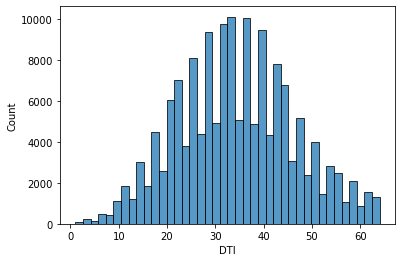

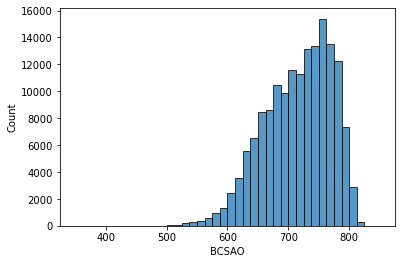

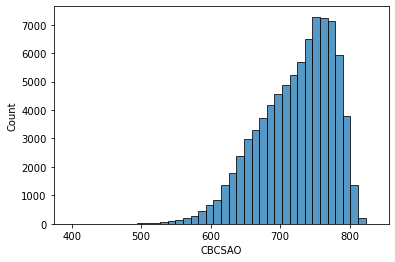

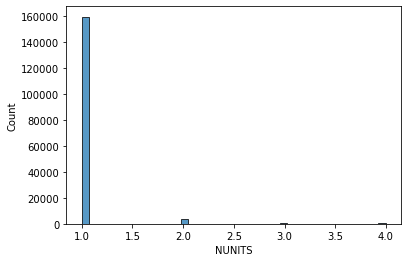

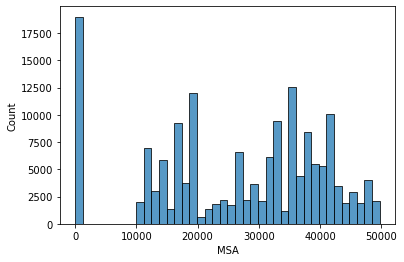

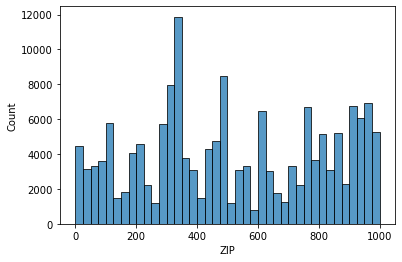

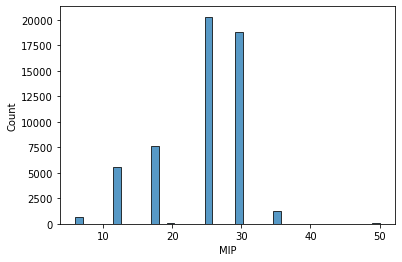

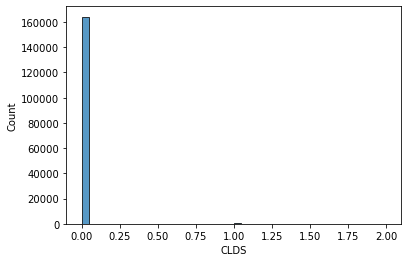

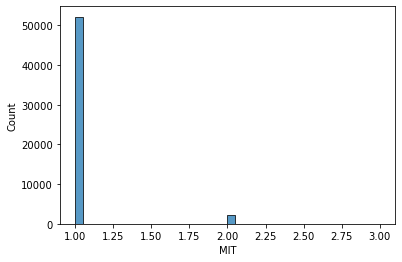

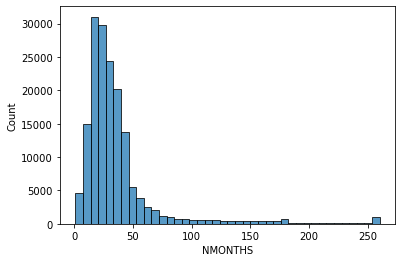

In [15]:
# Distribution plots: helps in understanding if the data is skewed or normally distributed:
for i in num_df.columns:
    sns.histplot(num_df[i], bins=40)
    plt.show()

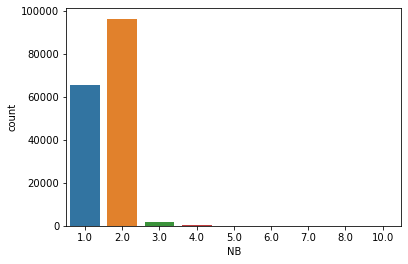

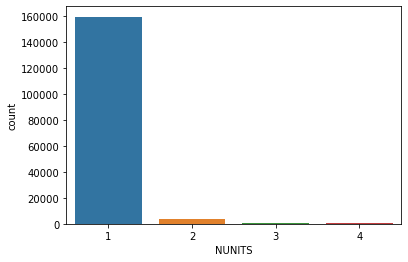

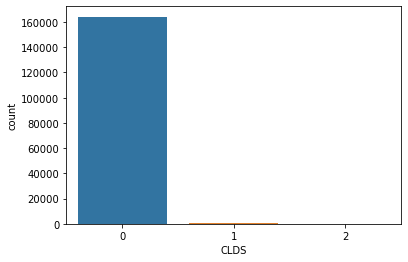

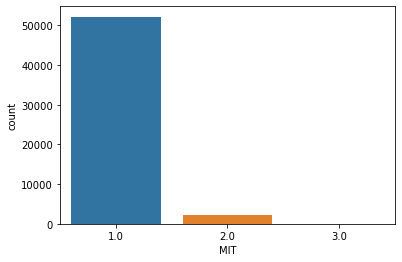

In [16]:
# Plotting the countplot for following columns, which has few unique values, to see the data distribution:
for j in ['NB', 'NUNITS', 'CLDS', 'MIT']:
    sns.countplot(num_df[j])
    plt.show()

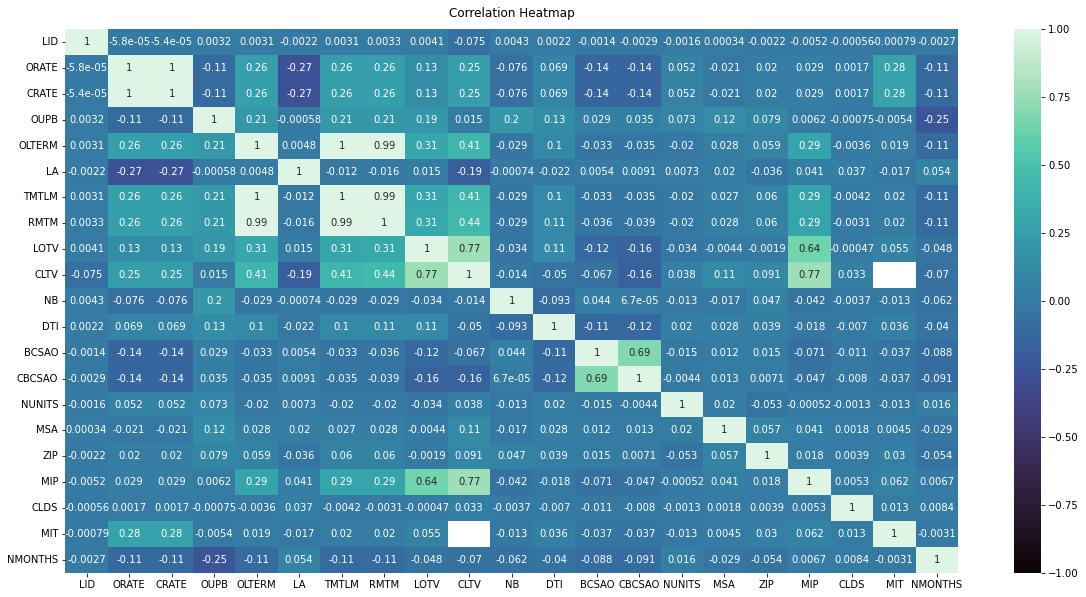

In [17]:
# Plotting Heat map to study correlation between variables
plt.figure(figsize=(20, 10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(num_df.corr(), vmin=-1, vmax=1, annot=True,cmap='mako')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Dealing with NaN values

In [18]:
# Looking for missing values:
num_df.isna().sum()

LID             0
ORATE           0
CRATE           0
OUPB            0
OLTERM          0
LA              0
TMTLM           0
RMTM            0
LOTV            1
CLTV       163905
NB            198
DTI          6998
BCSAO        3981
CBCSAO      82221
NUNITS          0
MSA             0
ZIP             0
MIP        110261
CLDS            0
MIT        110261
NMONTHS         0
dtype: int64

In [19]:
# As CLTV has more than 99% missing values we are dropping that column\
num_df.drop(columns='CLTV', inplace=True)

## APPLYING IMPUTATION

In [20]:
# Imputing LOTV with mean
num_df.LOTV.fillna(num_df.LOTV.mean(),inplace=True)
num_df.LOTV.isna().sum()

0

In [21]:
# Imputing NB with mode
num_df.NB.fillna(num_df.NB.mode()[0],inplace=True)
num_df.NB.isna().sum()

0

In [22]:
# Imputing DTI with mean
num_df.DTI.fillna(num_df.DTI.mean(),inplace=True)
num_df.DTI.isna().sum()

0

In [23]:
# imputing MIP and MIT with: '0', as if there is no insurance then it is considereed as 0 percentage and 0 type
num_df.MIP.fillna(0,inplace=True)
num_df.MIT.fillna(0,inplace=True)
print(num_df.MIT.isna().sum())
print(num_df.MIP.isna().sum())

0
0


In [24]:
num_df['Credit_score']=  num_df[['BCSAO','CBCSAO']].min(axis=1)
num_df.drop(columns=['BCSAO','CBCSAO'], inplace=True)

#### INSTEAD OF BCSAO and CBCSAO, as the bankers consider the lowest of two, creating a new column "Credit_Score" and then imputing it (dropping BCSAO and CBCSAO)

In [25]:
num_df['Credit_score'].isna().sum()

2560

In [26]:
# Imputing Credit_Score with Mean:
num_df.Credit_score.fillna(num_df.Credit_score.mean(),inplace=True)
num_df.Credit_score.isna().sum()

0

In [27]:
num_df.isna().sum().sum() # NO null values

0

### OBSERVATION: The Loan Age column has a negative value '-1', replacing it with '0'. And we do not need the Loan ID column:

In [28]:
num_df.LA.unique()

array([ 7,  1,  0,  2,  3,  5,  9, -1,  6,  4,  8, 12, 11, 10, 13])

In [29]:
num_df.LA.replace({-1:0}, inplace=True)

In [30]:
num_df.LA.unique()

array([ 7,  1,  0,  2,  3,  5,  9,  6,  4,  8, 12, 11, 10, 13])

In [31]:
num_df.drop(columns='LID', inplace=True)

In [32]:
num_df.columns

Index(['ORATE', 'CRATE', 'OUPB', 'OLTERM', 'LA', 'TMTLM', 'RMTM', 'LOTV', 'NB',
       'DTI', 'NUNITS', 'MSA', 'ZIP', 'MIP', 'CLDS', 'MIT', 'NMONTHS',
       'Credit_score'],
      dtype='object')

# TRANSFORMATIONS: to make the data close to gaussian distribution

In [33]:
for i in num_df.columns:
    print(i,'skewness:',num_df[i].skew())

ORATE skewness: -0.13002359493037166
CRATE skewness: -0.13004874211055262
OUPB skewness: 0.5905851381052853
OLTERM skewness: -1.6739258068131002
LA skewness: 4.567560791247683
TMTLM skewness: -1.6727554613035458
RMTM skewness: -1.6708324556392309
LOTV skewness: -1.1873004119021768
NB skewness: 0.08338541201470201
DTI skewness: 0.14082886364790173
NUNITS skewness: 7.958991743233406
MSA skewness: -0.44635094706693423
ZIP skewness: 0.03310971673953325
MIP skewness: 0.9662634992883457
CLDS skewness: 21.965629047249074
MIT skewness: 0.9689862004330966
NMONTHS skewness: 3.628766224754724
Credit_score skewness: -0.48772358825276363


ORATE


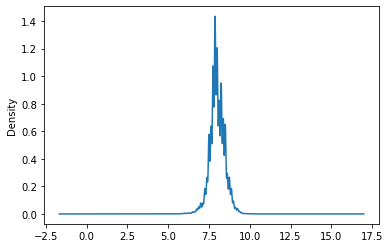

CRATE


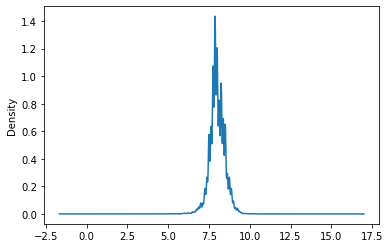

OUPB


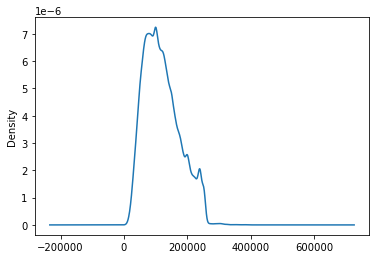

OLTERM


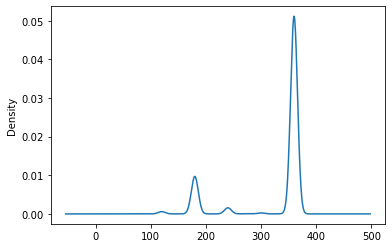

LA


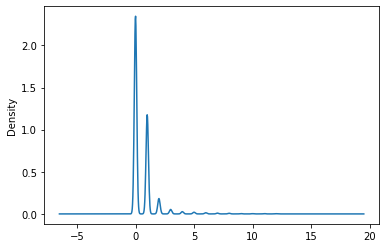

TMTLM


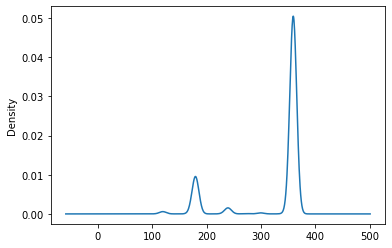

RMTM


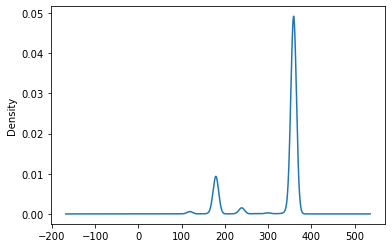

LOTV


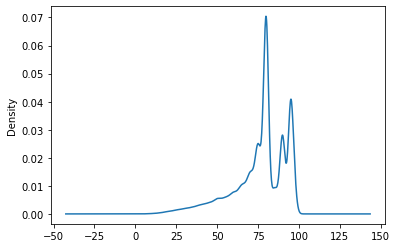

NB


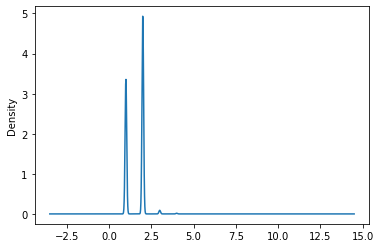

DTI


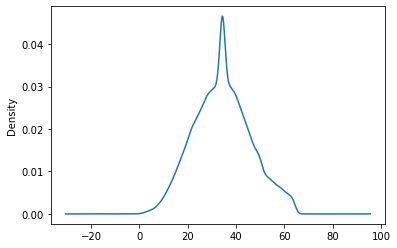

NUNITS


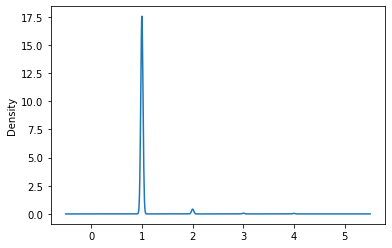

MSA


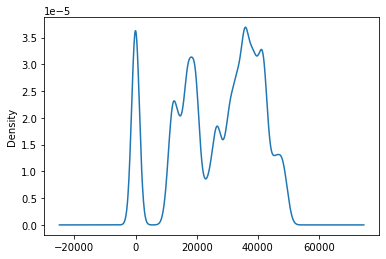

ZIP


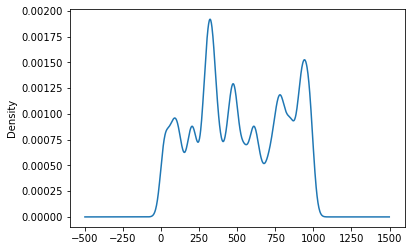

MIP


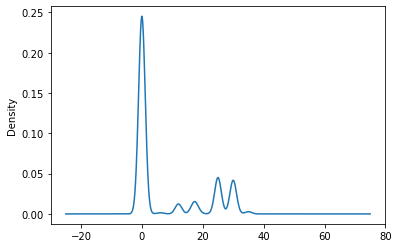

CLDS


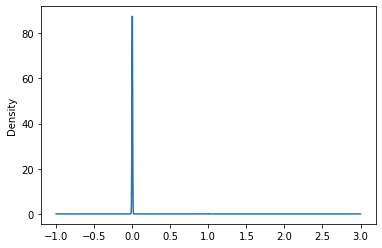

MIT


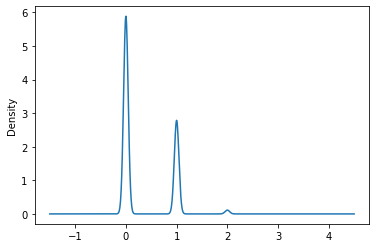

NMONTHS


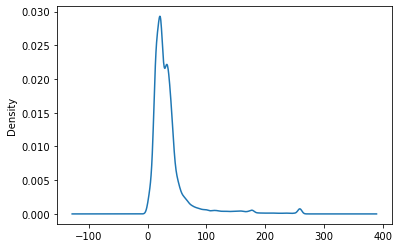

Credit_score


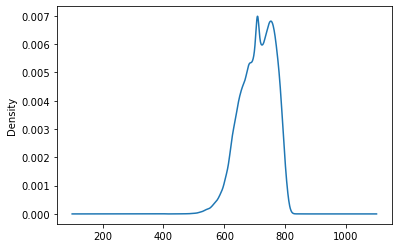

In [34]:
# Plotting kde graphs to see the skewness:
for i in num_df.columns:
    print(i)
    num_df[i].plot(kind='kde')
    plt.show()

ORATE skewness: 0.05359496105526253


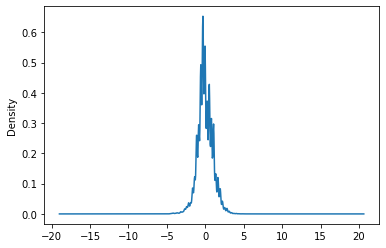

CRATE skewness: 0.0535952595012547


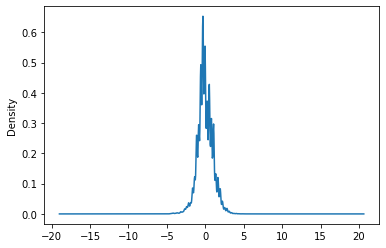

OUPB skewness: -0.03584120169471886


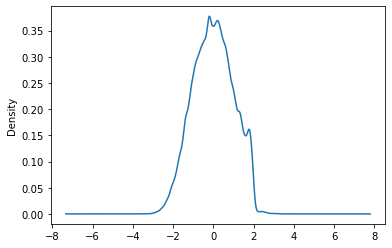

OLTERM skewness: -1.5556593036007262


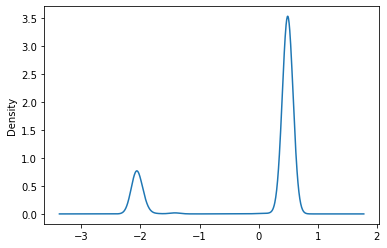

LA skewness: 0.5138656669761031


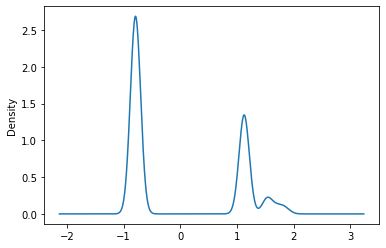

TMTLM skewness: -1.545688304273982


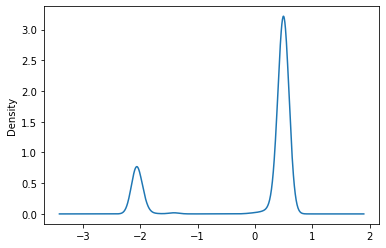

RMTM skewness: -1.5137079145159527


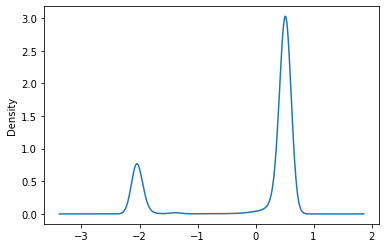

LOTV skewness: -0.23387330416574023


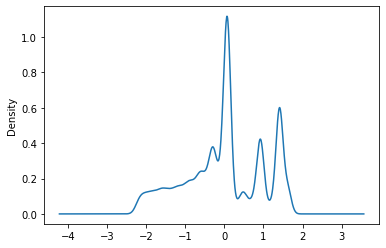

NB skewness: -0.041705718944408526


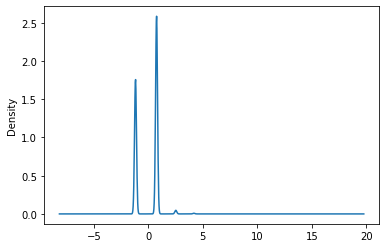

DTI skewness: -0.023842687762522113


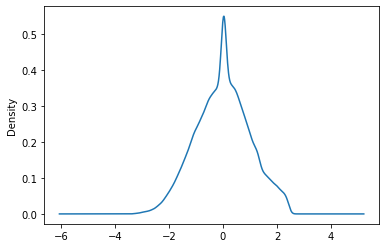

NUNITS skewness: 0


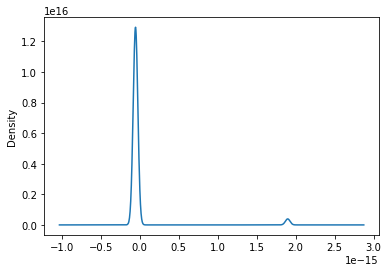

MSA skewness: -1.221808627645977


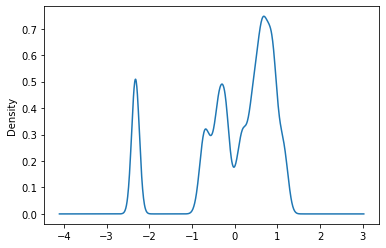

ZIP skewness: -0.25414724051083243


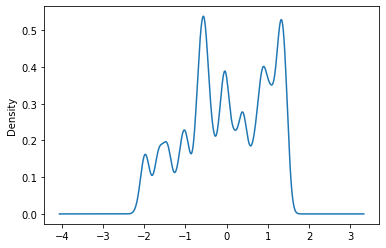

MIP skewness: 0.7277533457933564


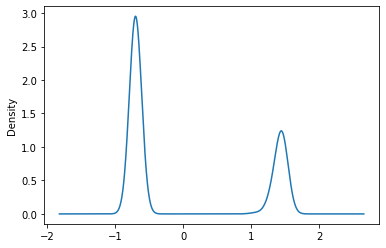

CLDS skewness: 20.962256306701466


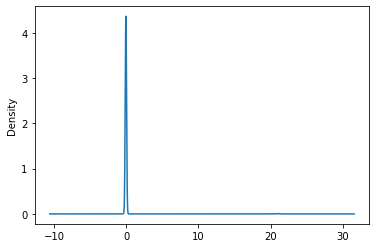

MIT skewness: 0.7246638117906512


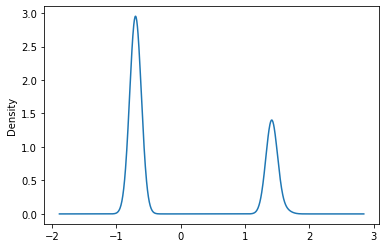

Credit_score skewness: -0.06959171604637386


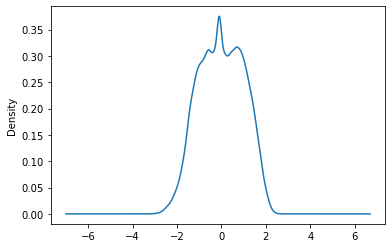

In [35]:
# Applying Power Transformation: We can observer the skewness came closer to '0'
pt = PowerTransformer()
for i in num_df.loc[:, num_df.columns != 'NMONTHS']:
    num_df['trans'+'_'+str(i)]= pt.fit_transform(num_df[i].values.reshape(-1,1))
    print(i,'skewness:' ,num_df['trans'+'_'+str(i)].skew() )
    num_df['trans'+'_'+str(i)].plot(kind='kde')
    plt.show()

In [36]:
# Dropping old columns
num_trans_df= num_df.drop(columns=['ORATE', 'CRATE', 'OUPB', 'OLTERM', 'LA', 'TMTLM', 'RMTM', 'LOTV', 'NB',
       'DTI', 'NUNITS', 'MSA', 'ZIP', 'MIP', 'CLDS', 'MIT', 'Credit_score'])

In [37]:
num_trans_df.columns

Index(['NMONTHS', 'trans_ORATE', 'trans_CRATE', 'trans_OUPB', 'trans_OLTERM',
       'trans_LA', 'trans_TMTLM', 'trans_RMTM', 'trans_LOTV', 'trans_NB',
       'trans_DTI', 'trans_NUNITS', 'trans_MSA', 'trans_ZIP', 'trans_MIP',
       'trans_CLDS', 'trans_MIT', 'trans_Credit_score'],
      dtype='object')

In [38]:
for k in num_trans_df.columns:
    print(k,num_trans_df[k].isna().sum())

NMONTHS 0
trans_ORATE 0
trans_CRATE 0
trans_OUPB 0
trans_OLTERM 0
trans_LA 0
trans_TMTLM 0
trans_RMTM 0
trans_LOTV 0
trans_NB 0
trans_DTI 0
trans_NUNITS 0
trans_MSA 0
trans_ZIP 0
trans_MIP 0
trans_CLDS 0
trans_MIT 0
trans_Credit_score 0


# Dealing with Categorical Columns:

In [39]:
data.columns

Index(['LID', 'CHANNEL', 'SELLER', 'ORATE', 'CRATE', 'OUPB', 'OLTERM', 'LA',
       'TMTLM', 'RMTM', 'LOTV', 'CLTV', 'NB', 'DTI', 'BCSAO', 'CBCSAO',
       'FTHBI', 'LP', 'PTYPE', 'NUNITS', 'OCCSTAT', 'STATE', 'MSA', 'ZIP',
       'MIP', 'CLDS', 'MIT', 'RMI', 'NMONTHS'],
      dtype='object')

In [40]:
num_trans_df.columns

Index(['NMONTHS', 'trans_ORATE', 'trans_CRATE', 'trans_OUPB', 'trans_OLTERM',
       'trans_LA', 'trans_TMTLM', 'trans_RMTM', 'trans_LOTV', 'trans_NB',
       'trans_DTI', 'trans_NUNITS', 'trans_MSA', 'trans_ZIP', 'trans_MIP',
       'trans_CLDS', 'trans_MIT', 'trans_Credit_score'],
      dtype='object')

In [41]:
cat_df= data.select_dtypes(exclude=np.number)

In [42]:
#OBSERVATION : Jpmorgan bank is written in different ways and hence considered
#wrongly as unique, correcting this:
cat_df["SELLER"]= cat_df["SELLER"].replace({
    'Jpmorgan Chase Bank, National Association':'Jpmorgan Chase Bank, Na',
    'Jp Morgan Chase Bank, Na':'Jpmorgan Chase Bank, Na'})
cat_df["SELLER"].unique()

array(['Suntrust Mortgage Inc.', 'Amtrust Bank',
       'Jpmorgan Chase Bank, Na', 'Bank Of America, N.A.', 'Other',
       'Bishops Gate Residential Mortgage Trust',
       'Wells Fargo Bank, N.A.', 'Citimortgage, Inc.',
       'Flagstar Bank, Fsb', 'Harwood Street Funding I, Llc',
       'Gmac Mortgage, Llc', 'Netbank Funding Services',
       'Rbc Mortgage Company',
       'First Tennessee Bank National Association', 'Regions Bank',
       'Usaa Federal Savings Bank', 'Pnc Bank, N.A.',
       'Old Kent Mortgage Company', 'Ge Mortgage Services, Llc',
       'Washtenaw Mortgage Company'], dtype=object)

In [43]:
# We already have zip, hence dropping STATE:
cat_df.drop(columns='STATE', inplace= True)

In [44]:
cat_df.columns

Index(['CHANNEL', 'SELLER', 'FTHBI', 'LP', 'PTYPE', 'OCCSTAT', 'RMI'], dtype='object')

# EDA on categorical data

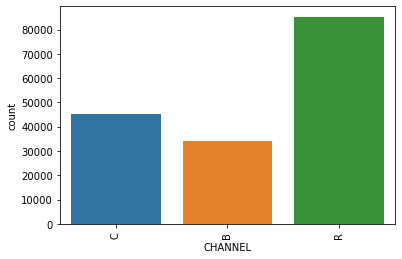

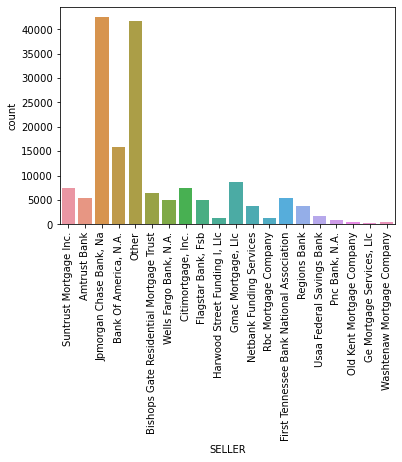

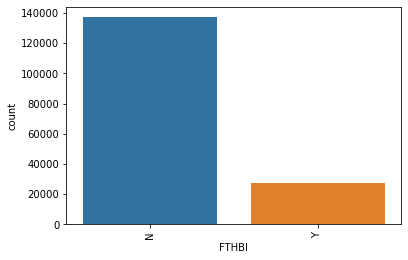

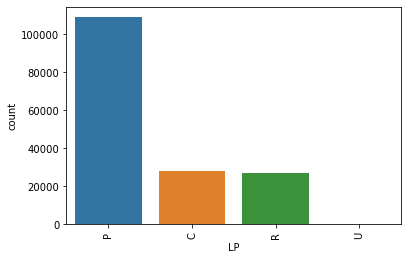

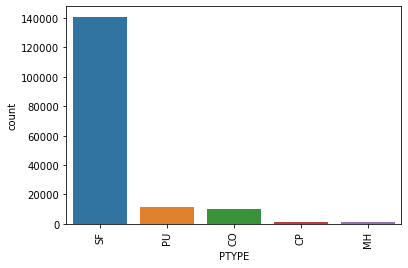

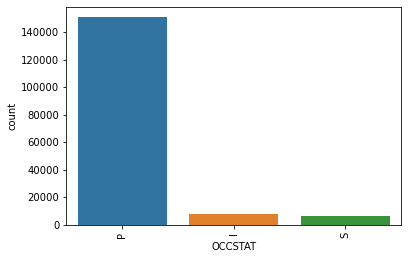

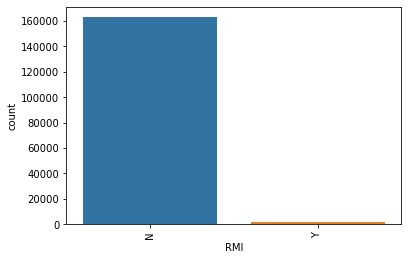

In [45]:
for j in cat_df.columns:
    sns.countplot(cat_df[j])
    plt.xticks(rotation=90)
    plt.show()

### Imputing the categorical Columns:

In [46]:
cat_df.isna().sum()

CHANNEL      0
SELLER       0
FTHBI      218
LP           0
PTYPE        0
OCCSTAT      0
RMI          0
dtype: int64

In [47]:
# Imputing Categorical dataframe
cat_df.FTHBI.fillna(cat_df.FTHBI.mode()[0], inplace=True)

In [48]:
cat_df.isna().sum()

CHANNEL    0
SELLER     0
FTHBI      0
LP         0
PTYPE      0
OCCSTAT    0
RMI        0
dtype: int64

## ENCODING:

In [49]:
#ONEHOT Encoding:following columns: 
impu_cat_df= pd.get_dummies(cat_df, columns=['CHANNEL', 'SELLER', 'FTHBI', 'LP',
                                                  'PTYPE', 'OCCSTAT', 'RMI'],drop_first=True)

In [50]:
# impu_cat_df['FORECLOSED_ENC']= cat_df['FORECLOSED'].replace({True:1, False:0})

In [51]:
# impu_cat_df.drop(columns='FORECLOSED', inplace=True)

In [52]:
impu_cat_df.columns

Index(['CHANNEL_C', 'CHANNEL_R', 'SELLER_Bank Of America, N.A.',
       'SELLER_Bishops Gate Residential Mortgage Trust',
       'SELLER_Citimortgage, Inc.',
       'SELLER_First Tennessee Bank National Association',
       'SELLER_Flagstar Bank, Fsb', 'SELLER_Ge Mortgage Services, Llc',
       'SELLER_Gmac Mortgage, Llc', 'SELLER_Harwood Street Funding I, Llc',
       'SELLER_Jpmorgan Chase Bank, Na', 'SELLER_Netbank Funding Services',
       'SELLER_Old Kent Mortgage Company', 'SELLER_Other',
       'SELLER_Pnc Bank, N.A.', 'SELLER_Rbc Mortgage Company',
       'SELLER_Regions Bank', 'SELLER_Suntrust Mortgage Inc.',
       'SELLER_Usaa Federal Savings Bank', 'SELLER_Washtenaw Mortgage Company',
       'SELLER_Wells Fargo Bank, N.A.', 'FTHBI_Y', 'LP_P', 'LP_R', 'LP_U',
       'PTYPE_CP', 'PTYPE_MH', 'PTYPE_PU', 'PTYPE_SF', 'OCCSTAT_P',
       'OCCSTAT_S', 'RMI_Y'],
      dtype='object')

In [53]:
impu_cat_df.shape

(164575, 32)

In [54]:
impu_cat_df.isna().sum()

CHANNEL_C                                           0
CHANNEL_R                                           0
SELLER_Bank Of America, N.A.                        0
SELLER_Bishops Gate Residential Mortgage Trust      0
SELLER_Citimortgage, Inc.                           0
SELLER_First Tennessee Bank National Association    0
SELLER_Flagstar Bank, Fsb                           0
SELLER_Ge Mortgage Services, Llc                    0
SELLER_Gmac Mortgage, Llc                           0
SELLER_Harwood Street Funding I, Llc                0
SELLER_Jpmorgan Chase Bank, Na                      0
SELLER_Netbank Funding Services                     0
SELLER_Old Kent Mortgage Company                    0
SELLER_Other                                        0
SELLER_Pnc Bank, N.A.                               0
SELLER_Rbc Mortgage Company                         0
SELLER_Regions Bank                                 0
SELLER_Suntrust Mortgage Inc.                       0
SELLER_Usaa Federal Savings 

In [55]:
num_trans_df.shape

(164575, 18)

In [56]:
concat_df= pd.concat([num_trans_df, impu_cat_df], axis=1)

In [57]:
concat_df.shape

(164575, 50)

# Applying Regression Algorithms

## Linear Regression:

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train, val = train_test_split(concat_df, test_size=0.2, random_state=0)
X_train = train.loc[:, train.columns != 'NMONTHS']
y_train= train.NMONTHS
X_val= val.loc[:, val.columns != 'NMONTHS']
y_val= val.NMONTHS
reg= LinearRegression(fit_intercept=True).fit(X_train,y_train)
y_pred=reg.predict(X_val)
e=y_val-y_pred
pd.Series(e)
MAD=e.apply(abs).mean()
print(MAD)

18.75278207981356


In [59]:
X_train.shape

(131660, 49)

In [60]:
X_train.shape

(131660, 49)

## RandomForest Regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=10, random_state=0, max_features=15)
regr.fit(X_train, y_train)
y_pred_rf= regr.predict(X_val)
e=y_val-y_pred_rf
pd.Series(e)
MAD=e.apply(abs).mean()
print(MAD)

18.30168895346855


# Applying on TEST.csv:

In [62]:
test_df= pd.read_csv('final_test_file_NMONTHS_regression.csv')
test_dff= test_df.drop(columns=['Unnamed: 0','LID'])

In [63]:
test_dff.shape

(82288, 49)

In [64]:
Y_val_Pred = regr.predict(test_dff)

In [65]:
pred_df= pd.DataFrame({'LID':test_df['LID'].to_list(),'pred':Y_val_Pred})

In [66]:
pred_df.head()

,LID,pred
0,7.940000e+11,27.909619
1,2.770000e+11,42.706465
2,5.070000e+11,35.045640
3,4.930000e+11,45.517399
4,8.430000e+11,28.390844


# Saving the Predictions as a CSV file

In [67]:
# Converting LID to 'object' type
pred_df['LID'] = pred_df['LID'].astype(object)

In [68]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82288 entries, 0 to 82287
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LID     82288 non-null  object 
 1   pred    82288 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


In [69]:
pred_df

,LID,pred
0,794000000000.0,27.909619
1,277000000000.0,42.706465
2,507000000000.0,35.045640
3,493000000000.0,45.517399
4,843000000000.0,28.390844
...,...,...
82283,612000000000.0,54.400408
82284,304000000000.0,59.164180
82285,718000000000.0,21.073134
82286,615000000000.0,33.652755


In [74]:
pred_df.rename(columns={'pred':'NMONTHS'}, inplace=True)

In [75]:
pred_df.to_csv('PREDS.csv')